In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset (For example, IMDb movie reviews)
data = pd.read_csv('/content/IMDB_Dataset.csv')  # Make sure to adjust this to your actual dataset
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Text cleaning function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Load the IMDB dataset
data = pd.read_csv('IMDB_Dataset.csv')

# Apply the cleaning function to the dataset
data['cleaned_reviews'] = data['review'].apply(preprocess_text)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_reviews'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorization using TF-IDF with built-in English stop words
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Vectorization completed.")


Vectorization completed.


In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_tfidf, y_train)

# Predict and Evaluate
y_pred_lr = log_reg.predict(X_test_tfidf)


In [ ]:
# Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict and Evaluate
y_pred_nb = nb.predict(X_test_tfidf)


In [ ]:
# Neural Network Model
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam')
nn.fit(X_train_tfidf, y_train)

# Predict and Evaluate
y_pred_nn = nn.predict(X_test_tfidf)


In [ ]:
# Function to print evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label='positive'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label='positive'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='positive'):.4f}")
    print("\n")

# Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Naive Bayes
evaluate_model(y_test, y_pred_nb, "Naive Bayes")

# Neural Network
evaluate_model(y_test, y_pred_nn, "Neural Network")


Evaluation for Logistic Regression:
Accuracy: 0.8892
Precision: 0.8786
Recall: 0.9051
F1 Score: 0.8917


Evaluation for Naive Bayes:
Accuracy: 0.8511
Precision: 0.8513
Recall: 0.8535
F1 Score: 0.8524


Evaluation for Neural Network:
Accuracy: 0.8633
Precision: 0.8590
Recall: 0.8718
F1 Score: 0.8654




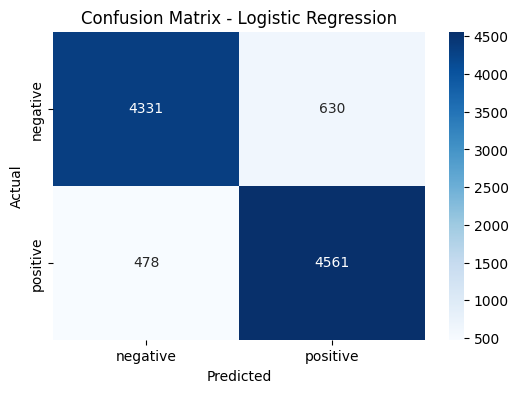

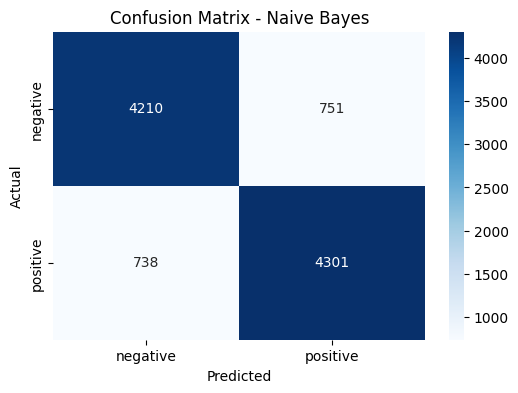

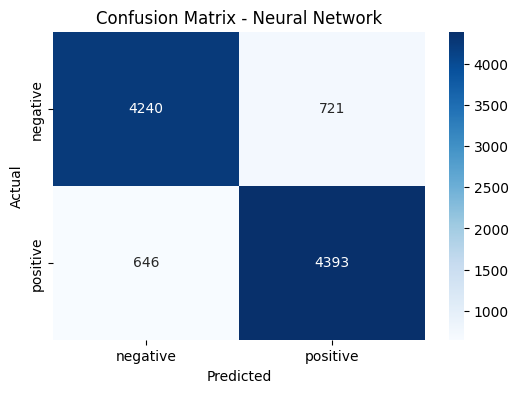

In [ ]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

# Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

# Neural Network
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network")


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression    0.8892   0.878636  0.905140  0.891691
1          Naive Bayes    0.8511   0.851346  0.853542  0.852443
2       Neural Network    0.8633   0.859014  0.871800  0.865360


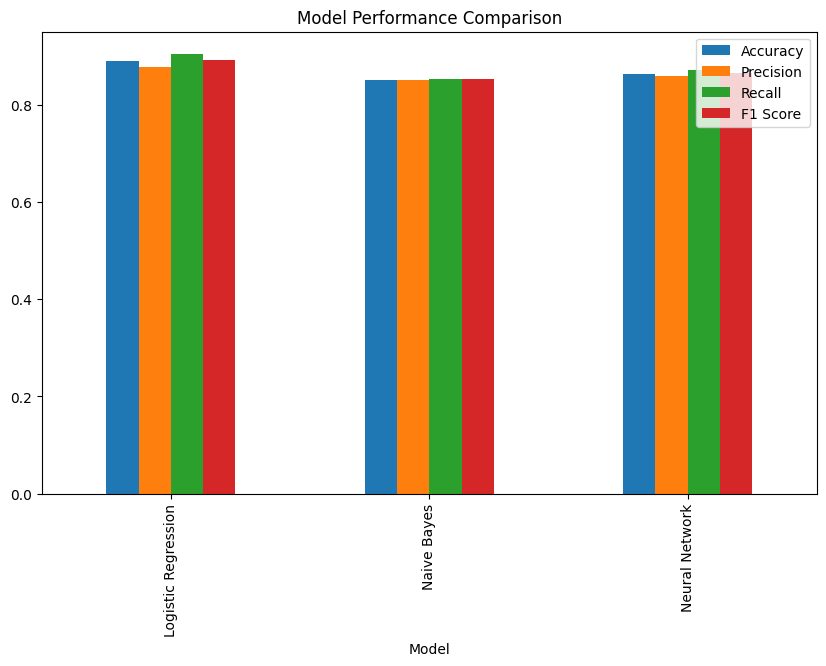

In [ ]:
# Combine model results into a dataframe for comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Neural Network'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_nn)],
    'Precision': [precision_score(y_test, y_pred_lr, pos_label='positive'), precision_score(y_test, y_pred_nb, pos_label='positive'), precision_score(y_test, y_pred_nn, pos_label='positive')],
    'Recall': [recall_score(y_test, y_pred_lr, pos_label='positive'), recall_score(y_test, y_pred_nb, pos_label='positive'), recall_score(y_test, y_pred_nn, pos_label='positive')],
    'F1 Score': [f1_score(y_test, y_pred_lr, pos_label='positive'), f1_score(y_test, y_pred_nb, pos_label='positive'), f1_score(y_test, y_pred_nn, pos_label='positive')]
})

# Visualize the comparison
print(results)
results.plot(x='Model', kind='bar', figsize=(10,6), title="Model Performance Comparison")
plt.show()


# ***Actual Working code***

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv('IMDB_Dataset.csv')

# Function to remove HTML tags using regex
def remove_html_tags(text):
    clean = re.compile('<.*?>')  # Regular expression to match HTML tags
    return re.sub(clean, '', text)

# Improved preprocessing function
def preprocess_text(text):
    text = remove_html_tags(text)  # Remove HTML tags
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply preprocessing to the dataset
data['cleaned_reviews'] = data['review'].apply(preprocess_text)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_reviews'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorization using TF-IDF for Logistic Regression and Naive Bayes
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Convert sentiment to binary labels (positive: 1, negative: 0)
y_train = y_train.map({'positive': 1, 'negative': 0})
y_test = y_test.map({'positive': 1, 'negative': 0})

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=200, C=1.0, solver='liblinear')
logistic_model.fit(X_train_tfidf, y_train)

y_pred_logistic = logistic_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

# Naive Bayes Model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Tokenization and Padding for Neural Network
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_reviews'])

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Load GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_embeddings = load_glove_embeddings('glove.6B.100d.txt')

# Create embedding matrix for the neural network
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Neural network architecture with dropout layers to prevent overfitting
def build_model(vocab_size, embedding_dim, max_length, embedding_matrix):
    model = Sequential()

    # Embedding layer with pre-trained GloVe embeddings
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=max_length,
                        trainable=False))

    # LSTM layer with Dropout
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.3))  # Dropout with 30% rate

    # Another LSTM layer with Dropout
    model.add(LSTM(units=128))
    model.add(Dropout(0.3))  # Dropout with 30% rate

    # Dense layer with Dropout
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Dropout with 50% rate

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Build and train the model
model = build_model(vocab_size=len(tokenizer.word_index)+1,
                    embedding_dim=100,
                    max_length=100,
                    embedding_matrix=embedding_matrix)

history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test), batch_size=64)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f"Neural Network Accuracy: {test_accuracy}")


Logistic Regression Accuracy: 0.8895
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Naive Bayes Accuracy: 0.8547
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 511ms/step - accuracy: 0.6508 - loss: 0.6075 - val_accuracy: 0.8078 - val_loss: 0.4247
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 302s 484ms/step - accuracy: 0.8211 - loss: 0.4066 - val_accuracy: 0.8376 - val_loss: 0.3616
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 301s 481ms/step - accuracy: 0.8470 - loss: 0.3587 - val_accuracy: 0.8482 - val_loss: 0.3374
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 321s 479ms/step - accuracy: 0.8565 - loss: 0.3365 - val_accuracy: 0.8521 - val_loss: 0.3314
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 481ms/step - accuracy: 0.8662 - loss: 0.3141 - val_accuracy: 0.8643 - val_loss: 0.3137
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 341s 512ms/step - accuracy: 0.8816 - loss: 0.2850 - val_accuracy: 0.8645 - val_loss: 0.3118
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 303s 481ms/step - accuracy: 0.8844 - loss: 0.2769 - val_accuracy: 0.8718 - val_loss: 0.3172
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 483ms/step - accuracy: 0.8974 -

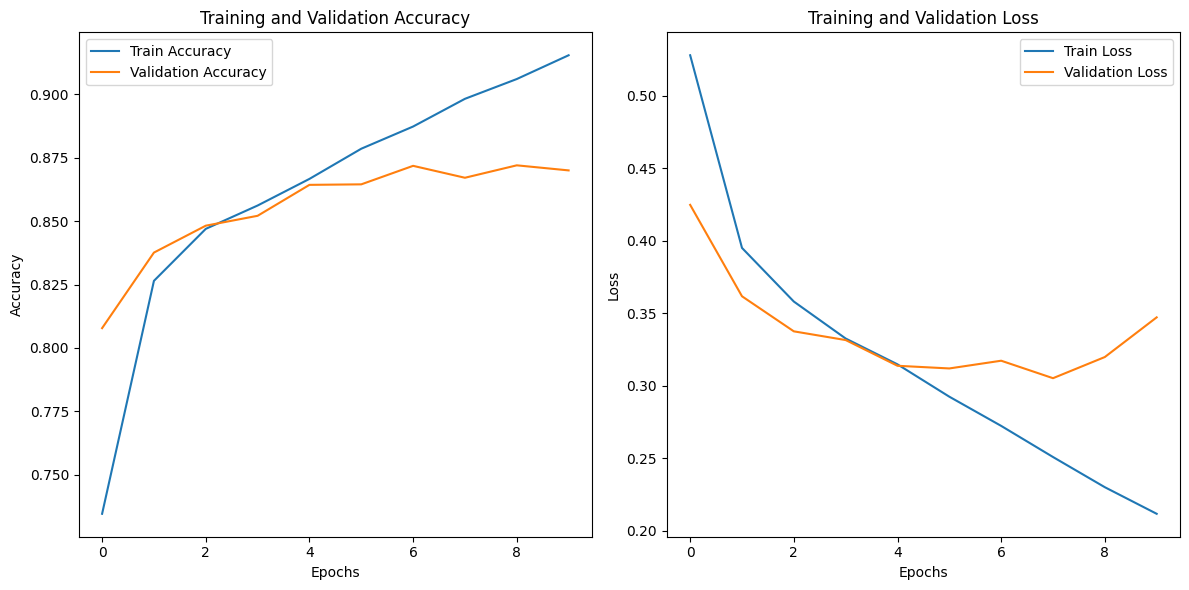

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step


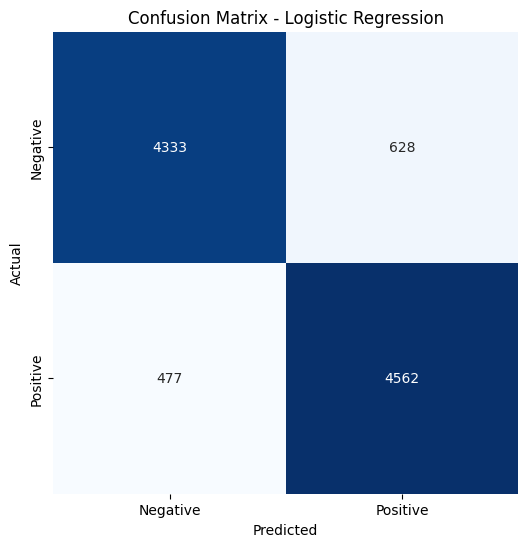

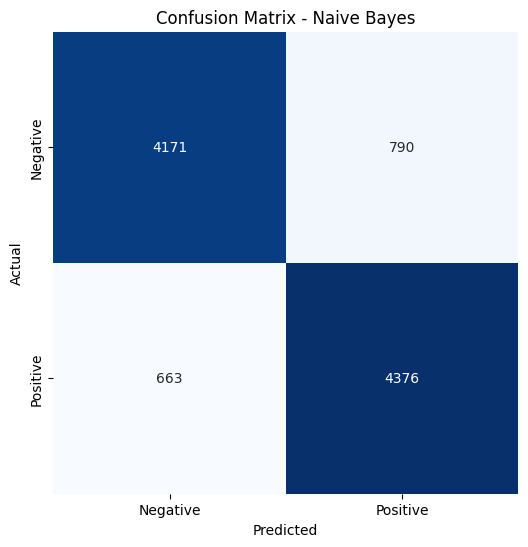

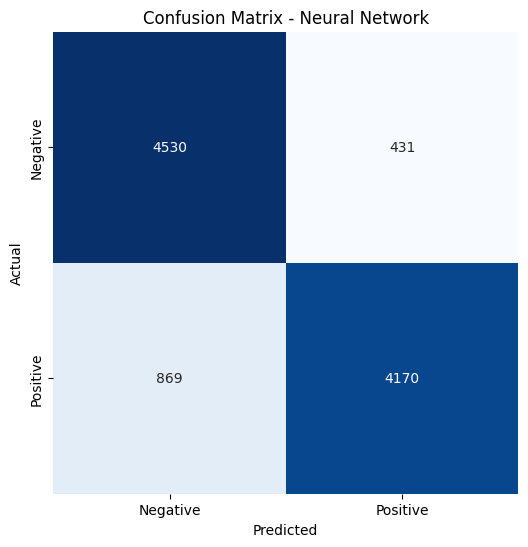

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 120ms/step


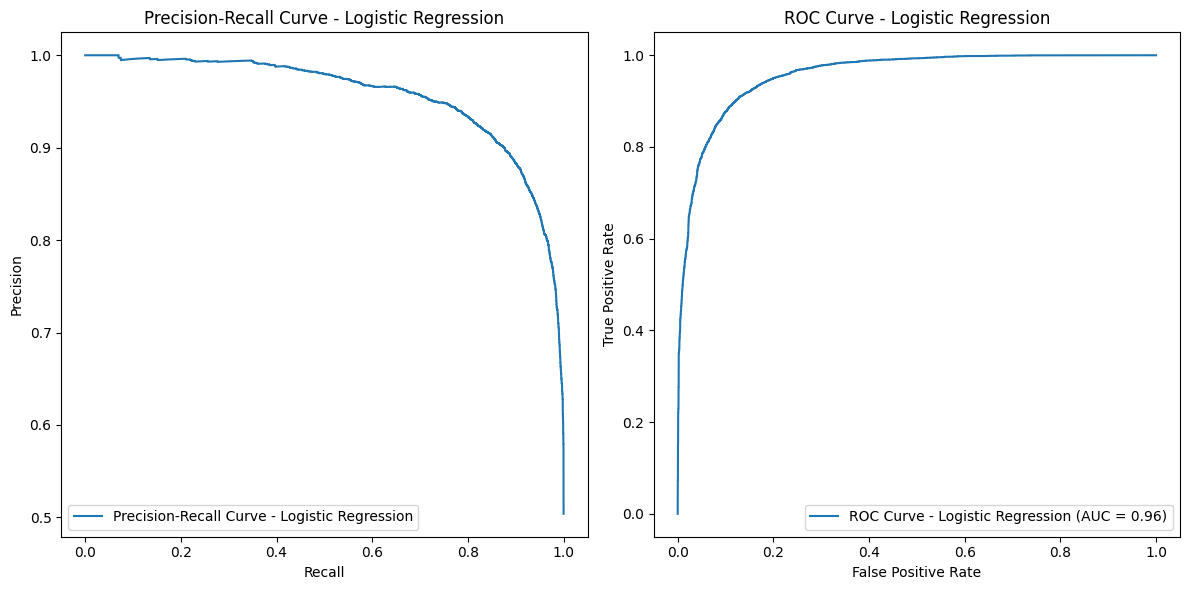

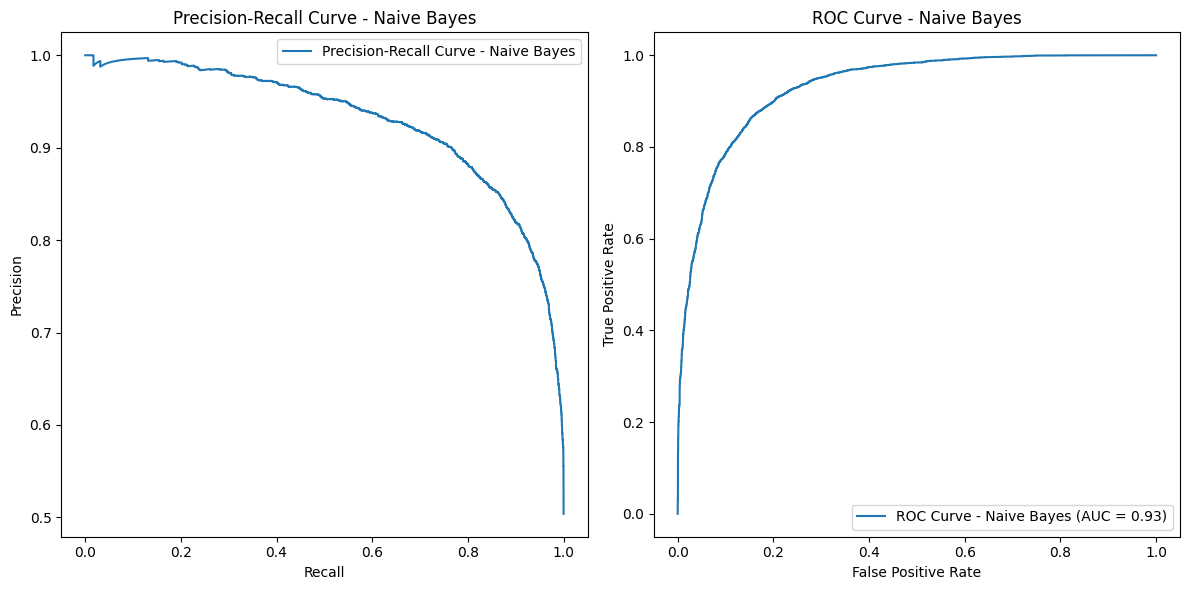

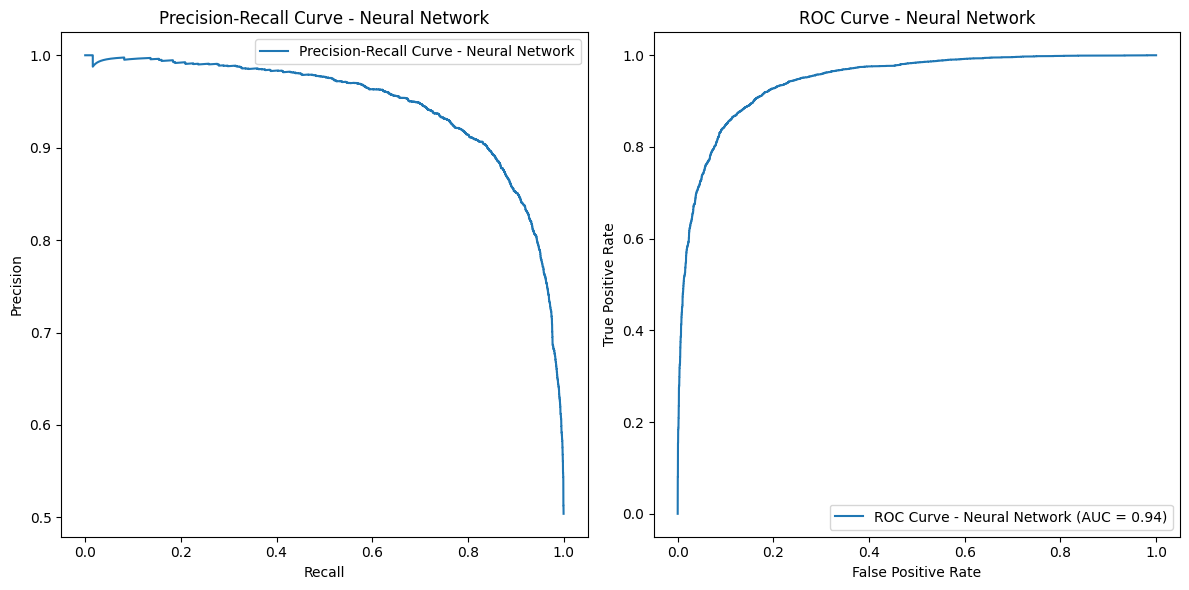

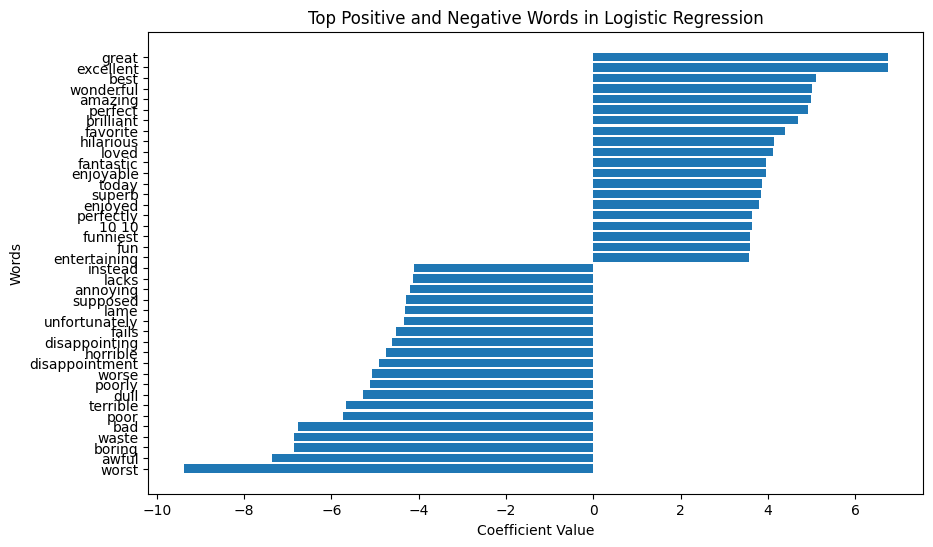

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

# Function to plot training and validation accuracy and loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Function to plot Precision-Recall and ROC curves
def plot_precision_recall_roc(y_test, y_pred_prob, model_name):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, label=f'Precision-Recall Curve - {model_name}')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f'ROC Curve - {model_name} (AUC = {roc_auc:.2f})')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to visualize top N important features (words) for logistic regression
def plot_top_n_words(model, tfidf, N=20):
    feature_names = np.array(tfidf.get_feature_names_out())
    coefs = model.coef_.flatten()

    # Get top N positive and negative words
    top_positive_words = np.argsort(coefs)[-N:]
    top_negative_words = np.argsort(coefs)[:N]

    top_words = np.concatenate([top_negative_words, top_positive_words])
    top_coefs = coefs[top_words]
    top_feature_names = feature_names[top_words]

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_feature_names, top_coefs)
    plt.title('Top Positive and Negative Words in Logistic Regression')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Words')
    plt.show()

# 1. Plot Training History for Neural Network
plot_training_history(history)

# 2. Plot Confusion Matrix for Logistic Regression, Naive Bayes, and Neural Network
y_pred_nn = (model.predict(X_test_pad) > 0.5).astype("int32")

plot_confusion_matrix(y_test, y_pred_logistic, title="Logistic Regression")
plot_confusion_matrix(y_test, y_pred_nb, title="Naive Bayes")
plot_confusion_matrix(y_test, y_pred_nn, title="Neural Network")

# 3. Plot Precision-Recall Curve and ROC Curve for Logistic Regression, Naive Bayes, and Neural Network
y_pred_logistic_prob = logistic_model.predict_proba(X_test_tfidf)[:, 1]
y_pred_nb_prob = naive_bayes_model.predict_proba(X_test_tfidf)[:, 1]
y_pred_nn_prob = model.predict(X_test_pad)

plot_precision_recall_roc(y_test, y_pred_logistic_prob, model_name="Logistic Regression")
plot_precision_recall_roc(y_test, y_pred_nb_prob, model_name="Naive Bayes")
plot_precision_recall_roc(y_test, y_pred_nn_prob, model_name="Neural Network")

# 4. Visualize Top N Important Words for Logistic Regression
plot_top_n_words(logistic_model, tfidf, N=20)


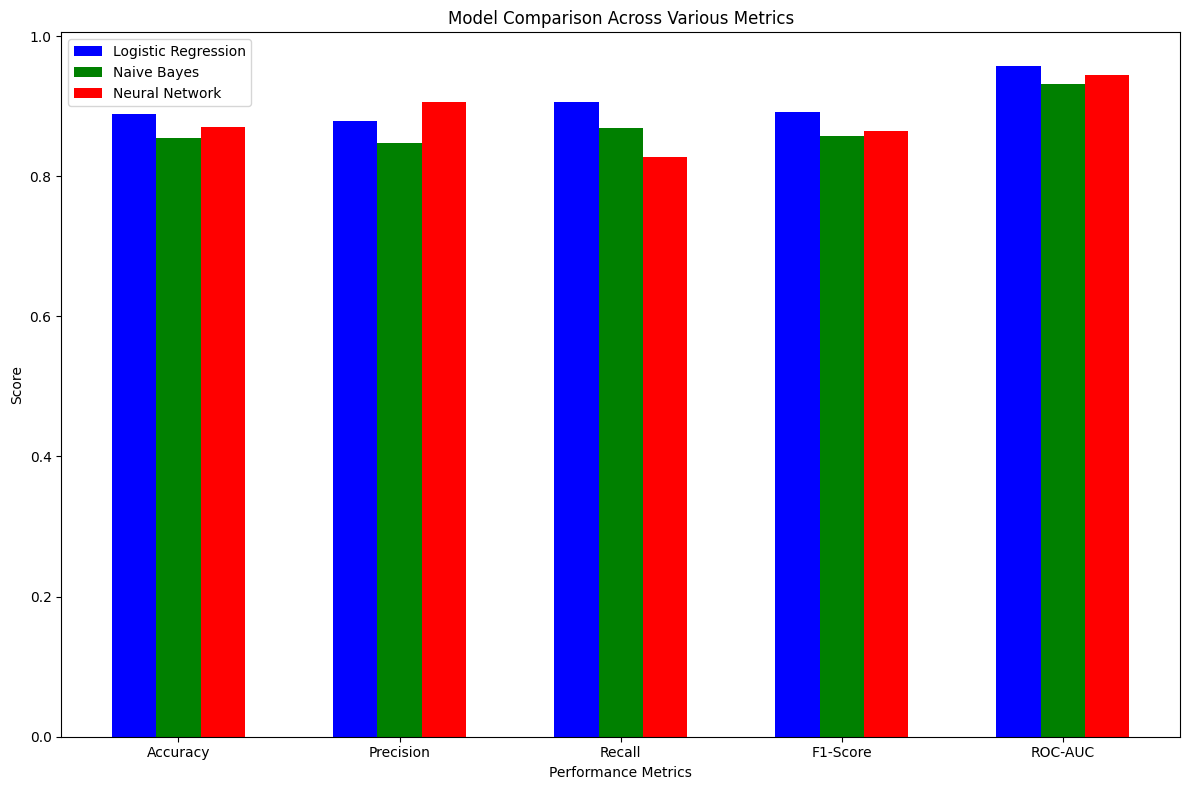

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to calculate and print performance metrics
def get_performance_metrics(model_name, y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Calculate metrics for all models
logistic_metrics = get_performance_metrics("Logistic Regression", y_test, y_pred_logistic, y_pred_logistic_prob)
naive_bayes_metrics = get_performance_metrics("Naive Bayes", y_test, y_pred_nb, y_pred_nb_prob)
nn_metrics = get_performance_metrics("Neural Network", y_test, y_pred_nn, y_pred_nn_prob)

# Combine metrics into a list
metrics_data = [logistic_metrics, naive_bayes_metrics, nn_metrics]

# Convert to a NumPy array for plotting
metrics_names = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
metrics_values = np.array([[m[metric] for m in metrics_data] for metric in metrics_names])

# Plot comparison of metrics
plt.figure(figsize=(12, 8))
bar_width = 0.2
x = np.arange(len(metrics_names))

plt.bar(x - bar_width, metrics_values[:, 0], bar_width, label="Logistic Regression", color='blue')
plt.bar(x, metrics_values[:, 1], bar_width, label="Naive Bayes", color='green')
plt.bar(x + bar_width, metrics_values[:, 2], bar_width, label="Neural Network", color='red')

plt.xticks(x, metrics_names)
plt.xlabel("Performance Metrics")
plt.ylabel("Score")
plt.title("Model Comparison Across Various Metrics")
plt.legend()
plt.tight_layout()
plt.show()
